# Bagging: Bootstrap aggregation is an ensemble learning technique used for both classifcation and regression problem

# The main motive of bagging is to reduce the variance of model and giving resultig model as low bias low variance

# 1.Bagging(classification)

In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv("//Users//udayladdha//Desktop//Data science//DataSets//iris.csv")
df.head()

,Id,Sepal Length (cm),Sepal Width (cm),Petal Length (cm),Petal Width (cm),Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df=df.iloc[:,1:] # dropped id column

In [4]:
df

,Sepal Length (cm),Sepal Width (cm),Petal Length (cm),Petal Width (cm),Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [5]:
from sklearn.preprocessing import LabelEncoder

In [6]:
lb=LabelEncoder()

In [7]:
df["Species"]=lb.fit_transform(df["Species"])

In [8]:
df.head()

,Sepal Length (cm),Sepal Width (cm),Petal Length (cm),Petal Width (cm),Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [9]:
df=df[df["Species"]!=0][["Sepal Width (cm)","Petal Length (cm)","Species"]]

In [10]:
df.head()

,Sepal Width (cm),Petal Length (cm),Species
50,3.2,4.7,1
51,3.2,4.5,1
52,3.1,4.9,1
53,2.3,4.0,1
54,2.8,4.6,1


In [11]:
df.shape

(100, 3)

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

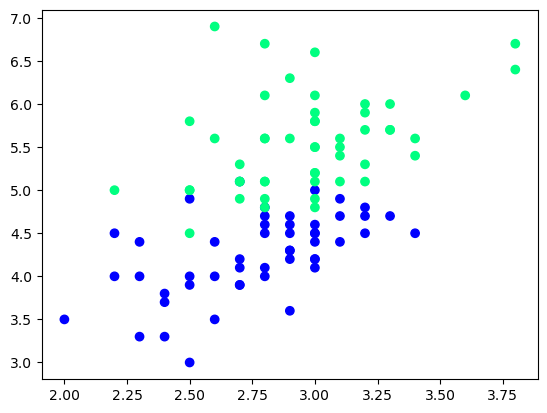

In [13]:
plt.scatter(df["Sepal Width (cm)"],df["Petal Length (cm)"],c=df["Species"],cmap="winter")

In [14]:
x=df.iloc[:,:2]

In [15]:
y=df.iloc[:,2]

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=21)

In [18]:
from sklearn.ensemble import BaggingClassifier

In [19]:
from sklearn.metrics import accuracy_score

In [20]:
# creating bagging classifer 
bagging_model=BaggingClassifier(estimator=None,n_estimators=10,random_state=42) # here if we use estimator as none it will automatically use decesion tree as base model

In [21]:
bagging_model.fit(x_train,y_train)                    # training bagging classifier
y_pred=bagging_model.predict(x_test)                  # predicting using bagginf classifier
print("accuracy:",(accuracy_score(y_test,y_pred))*100,"%")      # evaluating model using test data

accuracy: 90.0 %


# in bagging there are multiple ways to samle our subset of data to  give to base model like:
    pasting - we use row sampling without replacement
    random subspaces- we do column sampling 
    random patches - we do both 
    and to apply these we have different parameters in bagging classifier

# Bagging on different data 

In [22]:
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_classification

In [23]:
x,y=make_classification(n_samples=10000,n_features=10,n_informative=3)

In [24]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=21)

In [25]:
x_train.shape

(8000, 10)

In [26]:
# evaluting model using only decesion tree
dt=DecisionTreeClassifier(random_state=21)
dt.fit(x_train,y_train)
y_pred=dt.predict(x_test)
print("accuracy using decesion tree",accuracy_score(y_test,y_pred)*100,"%")

accuracy using decesion tree 92.2 %


In [27]:
# evaluationg using bagging
bagging_model=BaggingClassifier(estimator=DecisionTreeClassifier(), # base model
                               n_estimators=500,
                               max_samples=0.25,# traning data is 8000 rows so we are giving 2000 rows to each base model
                               bootstrap=True,  # row sampling with replacement 
                               random_state=42)

In [28]:
bagging_model.fit(x_train,y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(), max_samples=0.25,
                  n_estimators=500, random_state=42)

In [29]:
y_pred=bagging_model.predict(x_test)

In [30]:
print("accuracy score using bagging",accuracy_score(y_test,y_pred)*100,"%")

accuracy score using bagging 94.75 %


In [31]:
bagging_model.estimators_samples_  # list of every row index number that is given to our base models

[array([2523, 3113, 7114, ..., 4291, 4472, 3620]),
 array([4782,  663, 7155, ..., 5963,  495, 1767]),
 array([5462, 6574, 4896, ..., 3979, 7827,   37]),
 array([2848, 2629, 1591, ..., 7723, 1314, 1565]),
 array([3821, 6494, 1606, ..., 5686, 7870, 2558]),
 array([2261, 7922, 3649, ..., 4478, 6286, 6943]),
 array([ 652, 1676, 2291, ..., 2723, 7007, 6344]),
 array([2478, 4107, 1958, ..., 7979, 5695, 7854]),
 array([5800, 3548, 6540, ..., 3899,  831,   55]),
 array([5256, 7181, 3409, ..., 5286, 7535, 1335]),
 array([2675, 2834, 3817, ..., 1726, 2323, 7642]),
 array([3236, 7607, 4600, ...,  445, 7501, 6604]),
 array([4563, 4137, 6298, ..., 6611, 3023, 5529]),
 array([2816, 5343, 5817, ..., 3197, 2917, 5775]),
 array([2448, 2733, 5480, ...,  747, 5842,   69]),
 array([4248, 3828, 4630, ..., 1284, 2542, 3370]),
 array([4815, 1867,  503, ..., 4692, 7952, 4855]),
 array([1688, 4132, 5218, ..., 2491, 1876,  471]),
 array([4167, 2900, 3602, ..., 2974, 5705, 1466]),
 array([2920, 7645, 5452, ..., 

In [32]:
bagging_model.estimators_samples_ [0] # list of every row index number that is given to our 1st base models

array([2523, 3113, 7114, ..., 4291, 4472, 3620])

In [33]:
bagging_model.estimators_samples_ [0].shape # number of rows given to 1st base model

(2000,)

In [34]:
bagging_model.estimators_features_[0].shape # as we have not used column sample so our model got every column

(10,)

# Bagging using svm

In [35]:
# evaluationg using bagging
bagging_model1=BaggingClassifier(estimator=SVC(), # base model
                               n_estimators=500,
                               max_samples=0.25,# traning data is 8000 rows so we are giving 2000 rows to each base model
                               bootstrap=True,  # row sampling with replacement 
                               random_state=42)

In [36]:
bagging_model1.fit(x_train,y_train)

BaggingClassifier(estimator=SVC(), max_samples=0.25, n_estimators=500,
                  random_state=42)

In [37]:
y_pred=bagging_model1.predict(x_test)

In [38]:
print("bagging using svm",accuracy_score(y_test,y_pred)*100,"%")

bagging using svm 92.30000000000001 %


# using pasting : sampling rows without replacement 

In [39]:
# evaluationg using pasting
bagging_model2=BaggingClassifier(estimator=DecisionTreeClassifier(), # base model
                               n_estimators=500,
                               max_samples=0.25,# traning data is 8000 rows so we are giving 2000 rows to each base model
                               bootstrap=True,  # row sampling with replacement 
                               random_state=42,
                               verbose=True,  # info during traning will be shown
                               n_jobs=-1)     # computational speed gets fast (jitne bhi processor hai unmai devide ho jayega kam)

In [40]:
bagging_model2.fit(x_train,y_train)

[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 out of   8 | elapsed:    1.9s remaining:    5.6s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:    2.0s finished


BaggingClassifier(estimator=DecisionTreeClassifier(), max_samples=0.25,
                  n_estimators=500, n_jobs=-1, random_state=42, verbose=True)

In [41]:
y_pred=bagging_model2.predict(x_test)

[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 out of   8 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:    0.1s finished


In [42]:
print("accuracy with pasitng(row sampling without replacement)",accuracy_score(y_test,y_pred)*100,"%")

accuracy with pasitng(row sampling without replacement) 94.75 %


# random subspaces: sampling of column 

In [43]:
# evaluationg using random subspaces
bagging_model3=BaggingClassifier(estimator=DecisionTreeClassifier(), # base model
                               n_estimators=500,
                               max_samples=1.0,# traning data with every rows (8000) given to each base model as we are using random subspaces
                               bootstrap=False,  # row sampling without replacement 
                               random_state=42,
                               max_features=0.5, # using 5 columns out of 10 
                               bootstrap_features=True) #column sampling with replacement

In [44]:
bagging_model3.fit(x_train,y_train)

BaggingClassifier(bootstrap=False, bootstrap_features=True,
                  estimator=DecisionTreeClassifier(), max_features=0.5,
                  n_estimators=500, random_state=42)

In [45]:
y_pred=bagging_model3.predict(x_test)

In [46]:
print("accuracy score with column sampling with replacement:",accuracy_score(y_test,y_pred)*100,"%")

accuracy score with column sampling with replacement: 93.85 %


In [47]:
bagging_model3.estimators_features_[0].shape # as we used only 5 columns to give to our base model

(5,)

In [48]:
bagging_model3.estimators_samples_[0].shape  # we used every row

(8000,)

In [49]:
# with replacement means (data can be repeated)
# without replacement means (data can't be repeated)

# random patches : using both rows and column sampling

In [50]:
# evaluationg using random patches
bagging_model4=BaggingClassifier(estimator=DecisionTreeClassifier(), # base model
                               n_estimators=500,
                               max_samples=0.25,# using 2000 rows
                               bootstrap=True,  # row sampling with replacement 
                               random_state=42,
                               max_features=0.5, # using 5 columns out of 10 
                               bootstrap_features=True) # using column with replacement

In [51]:
bagging_model4.fit(x_train,y_train)

BaggingClassifier(bootstrap_features=True, estimator=DecisionTreeClassifier(),
                  max_features=0.5, max_samples=0.25, n_estimators=500,
                  random_state=42)

In [52]:
y_pred=bagging_model4.predict(x_test)

In [53]:
print("accuracy score using random patches:",accuracy_score(y_test,y_pred)*100,"%")

accuracy score using random patches: 93.0 %


# OOB Score: 37% of data is unseen by our base model which are called out of box data

In [54]:
bagging_model5=BaggingClassifier(estimator=DecisionTreeClassifier(), # base model
                               n_estimators=500,
                               max_samples=0.25,# using 2000 rows
                               bootstrap=True,  # row sampling with replacement 
                               random_state=42,
                               oob_score=True) 

In [56]:
bagging_model5.fit(x_train,y_train)
y_pred=bagging_model5.predict(x_test)
print(accuracy_score(y_test,y_pred)*100,"%")

94.75 %


In [62]:
print(bagging_model5.oob_score_*100,"%") # using this unseen data to evalute the model

94.1125 %


# Bagging tips

In [64]:
# 1.bagging generally gives better results than pasting
# 2.good results come around 25% to 50 % in row sampling
# 3.random patches and random subspaces are generally used when we have high dimension data 
# 4.to find correct hyperparameter we can use GridSearchCv or RandomSearchCv 

# Applying grid search cv

In [65]:
from sklearn.model_selection import GridSearchCV

In [69]:
parameters={
    "n_estimators":[50,100,500],
    "max_samples":[0.1,0.4,0.7,1.0],
    "bootstrap":[True,False],
    "max_features":[0.1,0.4,0.7,1.0],
    "n_jobs":[-1]
}

In [70]:
search=GridSearchCV(BaggingClassifier(),parameters,cv=5)

In [71]:
search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=BaggingClassifier(),
             param_grid={'bootstrap': [True, False],
                         'max_features': [0.1, 0.4, 0.7, 1.0],
                         'max_samples': [0.1, 0.4, 0.7, 1.0],
                         'n_estimators': [50, 100, 500], 'n_jobs': [-1]})

In [72]:
search.best_score_

0.946625

In [73]:
search.best_params_  # these are the best values of parameter we should use to get the accuracy of 94.6625

{'bootstrap': True,
 'max_features': 0.7,
 'max_samples': 1.0,
 'n_estimators': 500,
 'n_jobs': -1}